In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
from IPython.display import display
import wfdb 


Discovering the data

In [ ]:
# Load CSVs
df = pd.read_csv('ptbxl_database.csv')
scp_df = pd.read_csv('scp_statements.csv')
# Display basic info
print("ptbxl Database shape: ",df.shape)
print("Columns: ",df.columns)
print("scp_statements shape: ",scp_df.shape)
print("Columns: ",scp_df.columns)
# Show first few rows
# This tells pandas to display all columns (no truncation).
pd.set_option('display.max_columns',None)
display(df.head(5))

ptbxl Database shape:  (21799, 28)
Columns:  Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')
scp_statements shape:  (71, 13)
Columns:  Index(['Unnamed: 0', 'description', 'diagnostic', 'form', 'rhythm',
       'diagnostic_class', 'diagnostic_subclass', 'Statement Category',
       'SCP-ECG Statement Description', 'AHA code', 'aECG REFID', 'CDISC Code',
       'DICOM Code'],
      dtype='object')


,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


Filter data to contain only the ECGs that are either “NORM” or “AFIB”.

Visualize and explore ECG Signal Files (e.g., records100/)

Plot the record

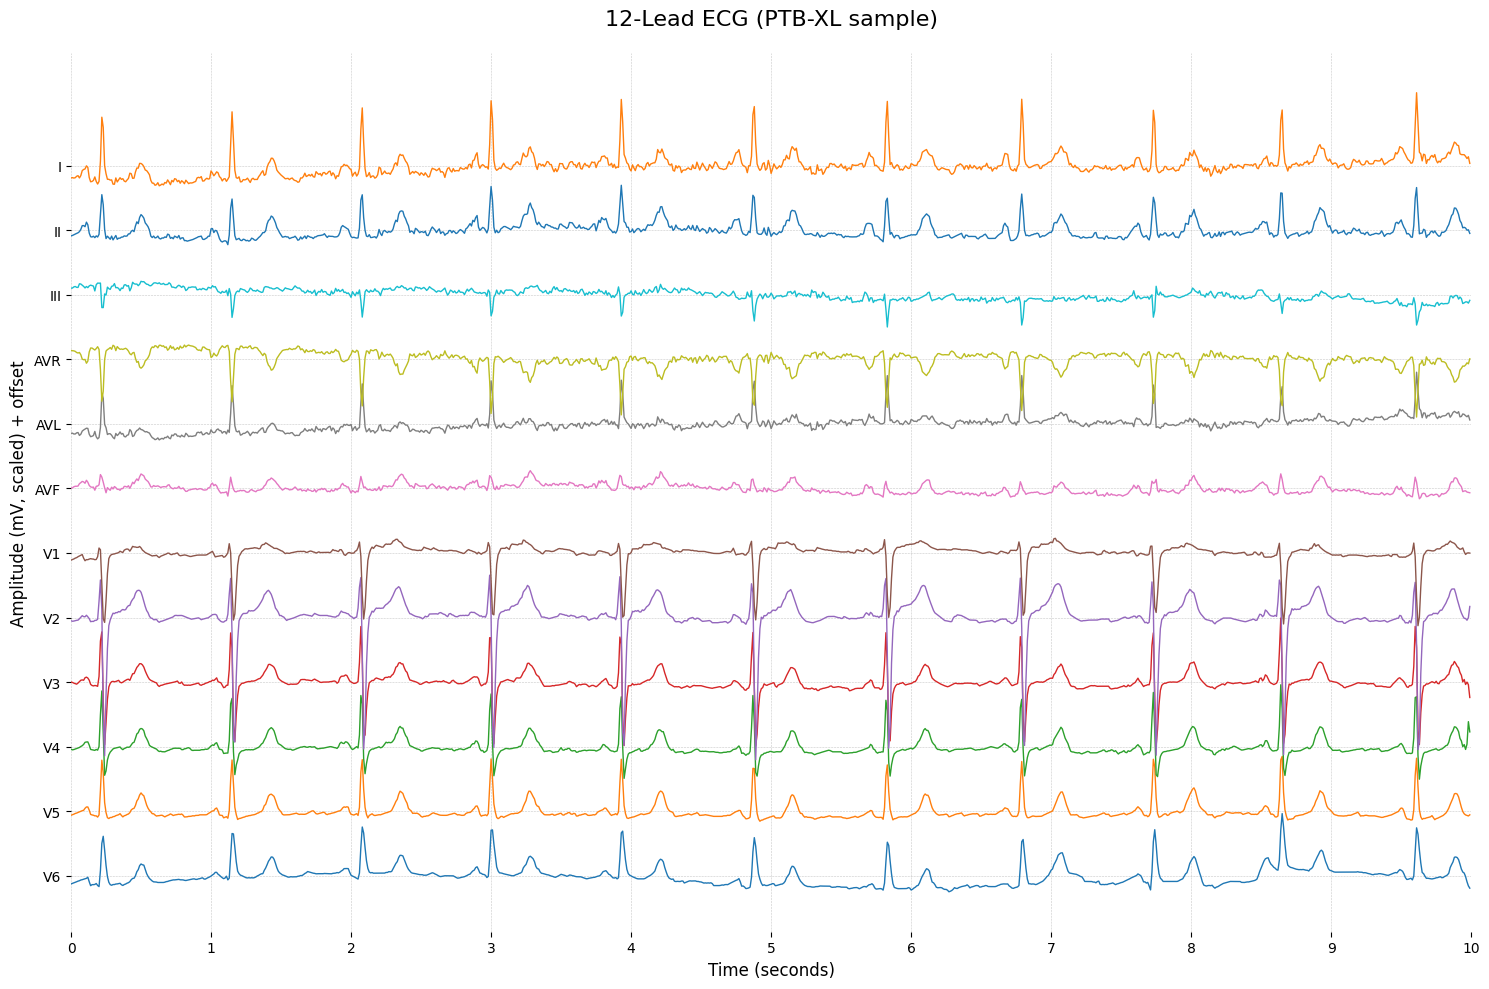

In [ ]:

# Load record
record = wfdb.rdrecord("records100/00000/00001_lr")

# Extract data
signals = record.p_signal
leads = record.sig_name
fs = record.fs
time = np.arange(signals.shape[0]) / fs  # seconds

# --- Plot settings ---
plt.figure(figsize=(15, 10))     # wide and tall
offset = 2.5                     # vertical spacing between leads
scale = 4.0                      # amplitude scale to make signals taller

# --- Beautiful plotting ---
for i, lead in enumerate(reversed(leads)):   # reverse so I is at top
    plt.plot(time, scale * signals[:, leads.index(lead)] + i * offset,
             lw=1.0, label=lead)

# --- Style the chart ---
plt.title("12-Lead ECG (PTB-XL sample)", fontsize=16, pad=20)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude (mV, scaled) + offset", fontsize=12)
plt.xlim(0, 10)
plt.yticks(np.arange(0, offset*len(leads), offset), reversed(leads))
plt.xticks(np.arange(0, 11, 1))
plt.grid(True, which="both", linestyle="--", linewidth=0.4, alpha=0.7)
plt.box(False)
plt.tight_layout()
plt.show()


Plot a single lead (e.g. Lead II) in detail

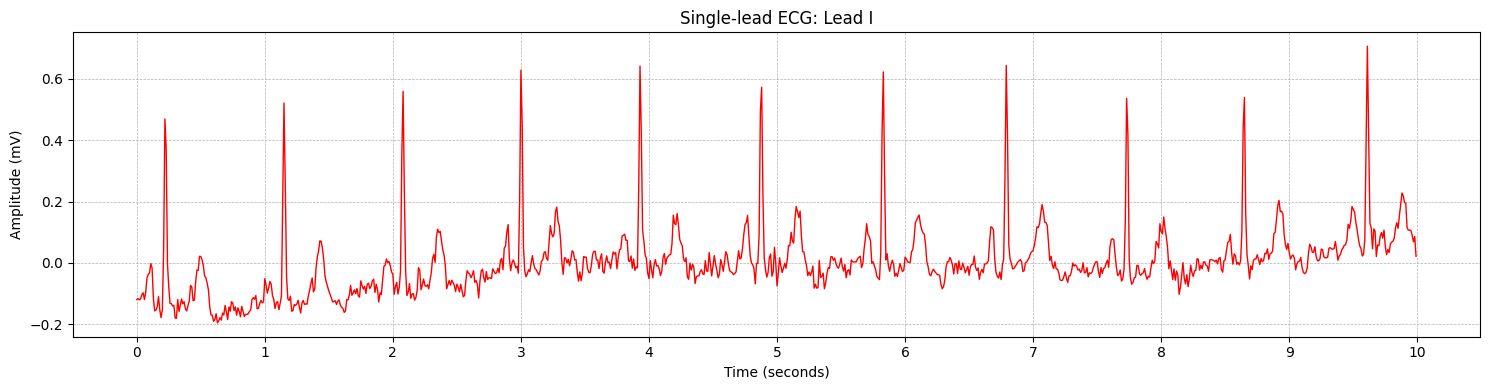

In [ ]:
lead_name = "I"
lead_index = leads.index(lead_name)

plt.figure(figsize=(15, 4))
plt.plot(time, signals[:, lead_index], color="red", lw=1)
plt.title(f"Single-lead ECG: Lead {lead_name}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.xticks(np.arange(0, 11, 1))

plt.show()


Plot 1 second (100 Hz = 100 samples and 500 Hz = 500 samples)

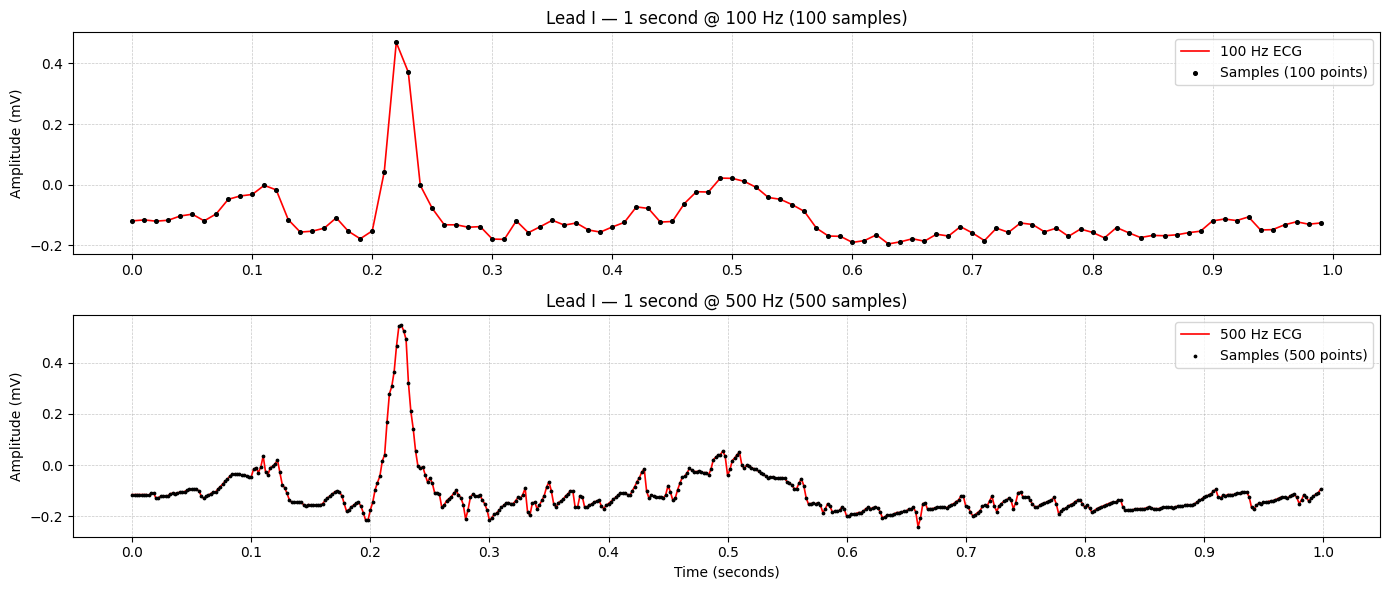

In [ ]:


# --- Load both sampling rates ---
record_100 = wfdb.rdrecord("records100/00000/00001_lr")  # 100 Hz
record_500 = wfdb.rdrecord("records500/00000/00001_hr")  # 500 Hz

# --- Extract Lead I ---
lead_name = "I"
lead_index_100 = record_100.sig_name.index(lead_name)
lead_index_500 = record_500.sig_name.index(lead_name)

# --- Get 1 second of data ---
fs_100 = record_100.fs
fs_500 = record_500.fs
t_100 = np.arange(fs_100) / fs_100
t_500 = np.arange(fs_500) / fs_500

sig_100 = record_100.p_signal[:fs_100, lead_index_100]
sig_500 = record_500.p_signal[:fs_500, lead_index_500]

# --- Plot side-by-side for comparison ---
plt.figure(figsize=(14, 6))

# 100 Hz subplot
plt.subplot(2, 1, 1)
plt.plot(t_100, sig_100, color="red", lw=1.2, label="100 Hz ECG")
plt.scatter(t_100, sig_100, color="black", s=7, zorder=3, label="Samples (100 points)")  # smaller points
plt.title(f"Lead {lead_name} — 1 second @ 100 Hz (100 samples)")
plt.ylabel("Amplitude (mV)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.xticks(np.arange(0, 1.1, 0.1))

# 500 Hz subplot
plt.subplot(2, 1, 2)
plt.plot(t_500, sig_500, color="red", lw=1.2, label="500 Hz ECG")
plt.scatter(t_500, sig_500, color="black", s=3, zorder=3, label="Samples (500 points)")   # even smaller points
plt.title(f"Lead {lead_name} — 1 second @ 500 Hz (500 samples)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.xticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()


0.3 s zoom showing detail difference between 100Hz and 500Hz

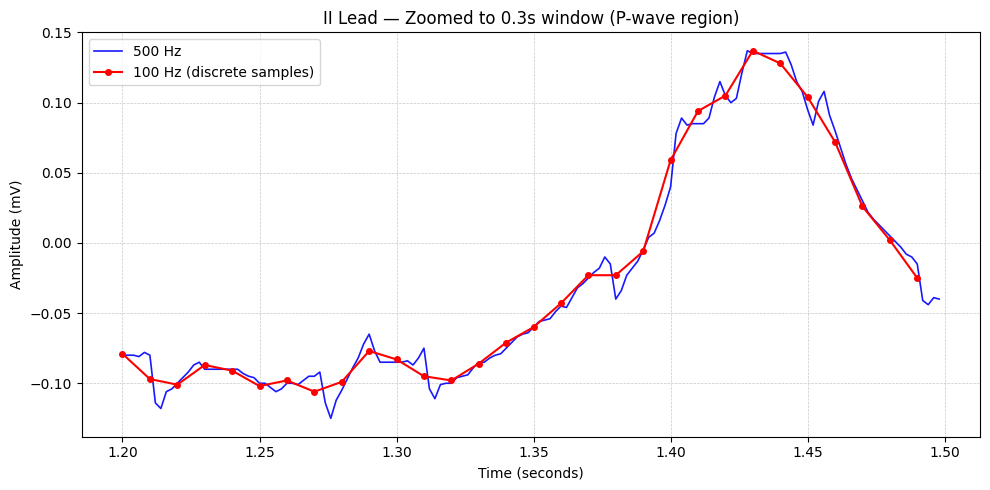

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load the same ECG at two sampling rates
record_100 = wfdb.rdrecord("records100/00000/00001_lr")  # 100 Hz
record_500 = wfdb.rdrecord("records500/00000/00001_hr")  # 500 Hz

lead_name = "II"  # V2 often shows a clean P-wave region
lead_index_100 = record_100.sig_name.index(lead_name)
lead_index_500 = record_500.sig_name.index(lead_name)

# Sampling rates
fs_100 = record_100.fs
fs_500 = record_500.fs

# Choose a time window (e.g., 1.2s to 1.5s)
start_time = 1.2
end_time = 1.5
duration = end_time - start_time

# Convert to sample indices
start_100 = int(start_time * fs_100)
end_100 = int(end_time * fs_100)
start_500 = int(start_time * fs_500)
end_500 = int(end_time * fs_500)

# Extract signal segments
t_100 = np.arange(start_100, end_100) / fs_100
t_500 = np.arange(start_500, end_500) / fs_500
sig_100 = record_100.p_signal[start_100:end_100, lead_index_100]
sig_500 = record_500.p_signal[start_500:end_500, lead_index_500]

# Plot overlay for direct comparison
plt.figure(figsize=(10, 5))
plt.plot(t_500, sig_500, color="blue", lw=1.2, alpha=0.9, label="500 Hz")
plt.plot(t_100, sig_100, color="red", lw=1.5, marker="o", markersize=4,
         markevery=1, label="100 Hz (discrete samples)")

plt.title(f"{lead_name} Lead — Zoomed to {duration:.1f}s window (P-wave region)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Example: 0.3 s zoom where 100 Hz loses AF-critical detail

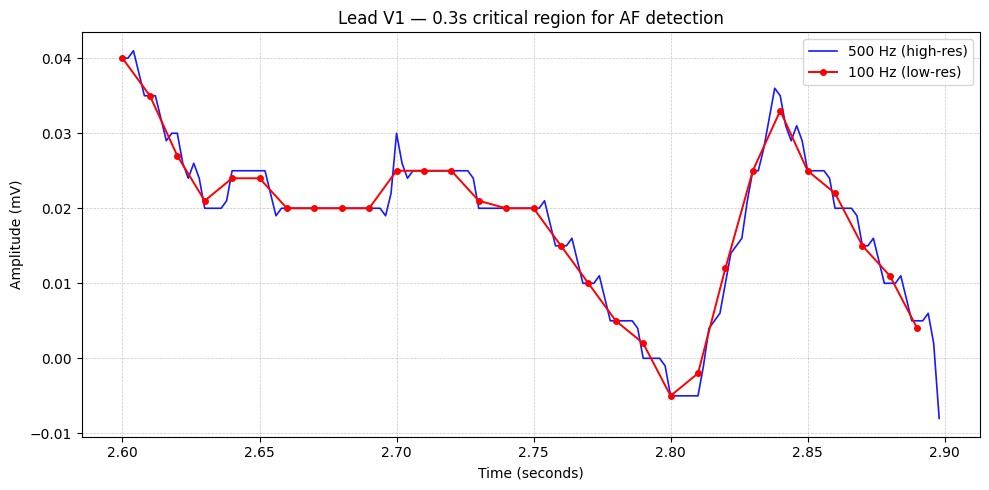

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# --- Load same ECG at 100 Hz and 500 Hz ---
record_100 = wfdb.rdrecord("records100/00000/00001_lr")  # low-res (100 Hz)
record_500 = wfdb.rdrecord("records500/00000/00001_hr")  # high-res (500 Hz)

# --- Choose a lead sensitive to AF detection (Lead V1 or II are best) ---
lead_name = "V1"
lead_index_100 = record_100.sig_name.index(lead_name)
lead_index_500 = record_500.sig_name.index(lead_name)

# --- Sampling frequencies ---
fs_100 = record_100.fs
fs_500 = record_500.fs

# --- Select a 0.3 s region that includes small oscillations / irregularity ---
start_time = 2.6
end_time   = 2.9
duration   = end_time - start_time

# --- Convert to sample indices ---
start_100 = int(start_time * fs_100)
end_100   = int(end_time   * fs_100)
start_500 = int(start_time * fs_500)
end_500   = int(end_time   * fs_500)

# --- Extract data segments ---
t_100 = np.arange(start_100, end_100) / fs_100
t_500 = np.arange(start_500, end_500) / fs_500
sig_100 = record_100.p_signal[start_100:end_100, lead_index_100]
sig_500 = record_500.p_signal[start_500:end_500, lead_index_500]

# --- Plot both on same axes for comparison ---
plt.figure(figsize=(10, 5))
plt.plot(t_500, sig_500, color="blue", lw=1.2, alpha=0.9, label="500 Hz (high-res)")
plt.plot(t_100, sig_100, color="red", lw=1.4, marker="o", markersize=4,
         label="100 Hz (low-res)")

plt.title(f"Lead {lead_name} — {duration:.1f}s critical region for AF detection")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.xticks(np.arange(start_time, end_time + 0.01, 0.05))
plt.tight_layout()
plt.show()


he blue 500 Hz waveform reveals fast, irregular, fine undulations between QRS peaks — features that could correspond to atrial fibrillation (or fine baseline noise).

The red 100 Hz samples look smoothed and less detailed — those subtle variations get flattened out.

Such loss of high-frequency detail can cause:

missed detection of fibrillatory waves,

inaccurate R-R variability measurement,

and lower AF detection accuracy.

Compare normal and AF signal

✅ Selected examples:
   Normal Record ID: 15660
   Normal File:      records500/15000/15660_hr
   AFIB Record ID:   6692
   AFIB File:        records500/06000/06692_hr



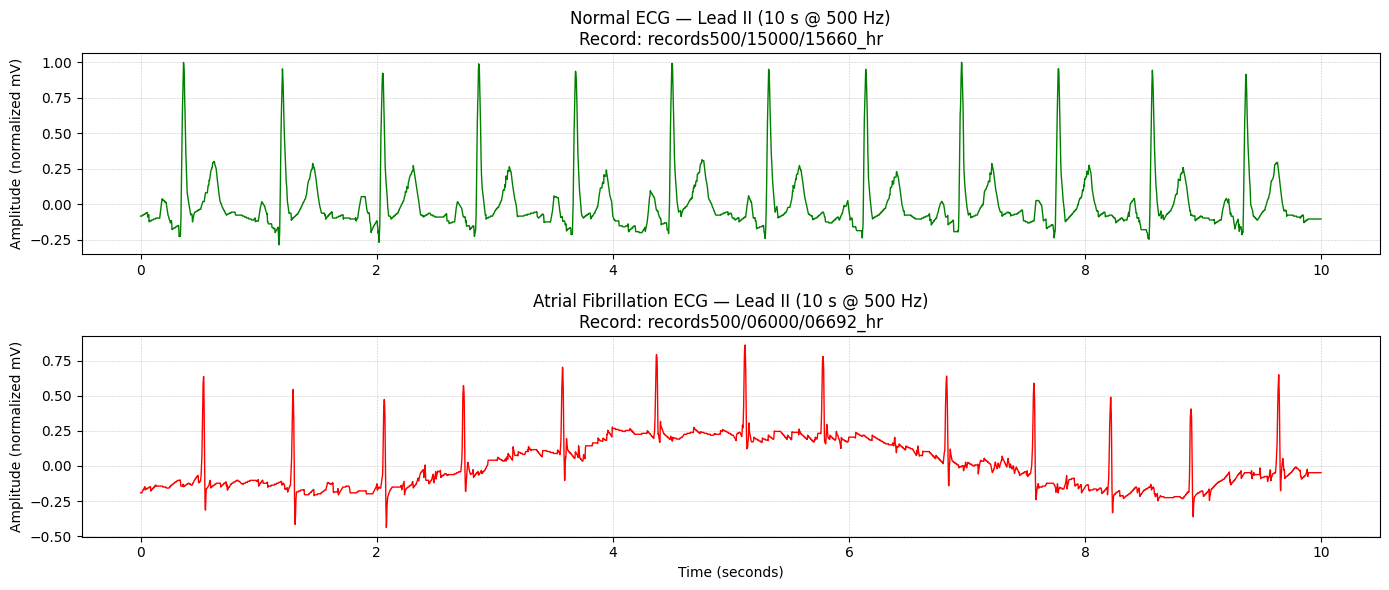

In [ ]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# ----------------------------
# 🔹 Load PTB-XL metadata
# ----------------------------
path = "./"   # Update if needed

df = pd.read_csv(path + "ptbxl_database.csv", index_col="ecg_id")
df["scp_codes"] = df["scp_codes"].apply(ast.literal_eval)

scp_df = pd.read_csv(path + "scp_statements.csv", index_col=0)
scp_df = scp_df[["diagnostic", "diagnostic_class"]]
scp_df = scp_df[scp_df["diagnostic"] == 1]

# ----------------------------
# 🔹 Helper function
# ----------------------------
def aggregate_diagnostic(scp_codes):
    """Map SCP codes to diagnostic superclasses."""
    classes = []
    for code in scp_codes.keys():
        if code in scp_df.index:
            classes.append(scp_df.loc[code, "diagnostic_class"])
    return list(set(classes))

df["diagnostic_superclass"] = df["scp_codes"].apply(aggregate_diagnostic)

# ----------------------------
# 🔹 Select Normal & AFIB examples randomly
# ----------------------------
df_norm = df[df["diagnostic_superclass"].apply(lambda x: "NORM" in x)]
df_afib = df[df["scp_codes"].apply(lambda d: "AFIB" in d.keys())]

# Pick one of each (different each run)
norm_row = df_norm.sample(1).iloc[0]
afib_row = df_afib.sample(1).iloc[0]

print("✅ Selected examples:")
print(f"   Normal Record ID: {norm_row.name}")
print(f"   Normal File:      {norm_row.filename_hr}")
print(f"   AFIB Record ID:   {afib_row.name}")
print(f"   AFIB File:        {afib_row.filename_hr}\n")

# ----------------------------
# 🔹 Load both ECGs at 500 Hz
# ----------------------------
rec_norm = wfdb.rdrecord(path + norm_row.filename_hr)
rec_afib = wfdb.rdrecord(path + afib_row.filename_hr)

lead_name = "II"  # typical lead for rhythm analysis
idx_norm = rec_norm.sig_name.index(lead_name)
idx_afib = rec_afib.sig_name.index(lead_name)

fs = rec_norm.fs  # should be 500 Hz
duration = 10
samples = int(duration * fs)

t = np.arange(samples) / fs
sig_norm = rec_norm.p_signal[:samples, idx_norm]
sig_afib = rec_afib.p_signal[:samples, idx_afib]

# Normalize amplitude to common scale (optional)
max_amp = max(np.abs(sig_norm).max(), np.abs(sig_afib).max())
sig_norm = sig_norm / max_amp
sig_afib = sig_afib / max_amp

# ----------------------------
# 🔹 Plot
# ----------------------------
plt.figure(figsize=(14, 6))

# Normal ECG
plt.subplot(2, 1, 1)
plt.plot(t, sig_norm, color="green", lw=1)
plt.title(f"Normal ECG — Lead {lead_name} (10 s @ {fs} Hz)\nRecord: {norm_row.filename_hr}")
plt.ylabel("Amplitude (normalized mV)")
plt.grid(True, linestyle="--", linewidth=0.4, alpha=0.7)

# AFIB ECG
plt.subplot(2, 1, 2)
plt.plot(t, sig_afib, color="red", lw=1)
plt.title(f"Atrial Fibrillation ECG — Lead {lead_name} (10 s @ {fs} Hz)\nRecord: {afib_row.filename_hr}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (normalized mV)")
plt.grid(True, linestyle="--", linewidth=0.4, alpha=0.7)

plt.tight_layout()
plt.show()


Visual examples AFIB

Found 1514 AFIB records in dataset.


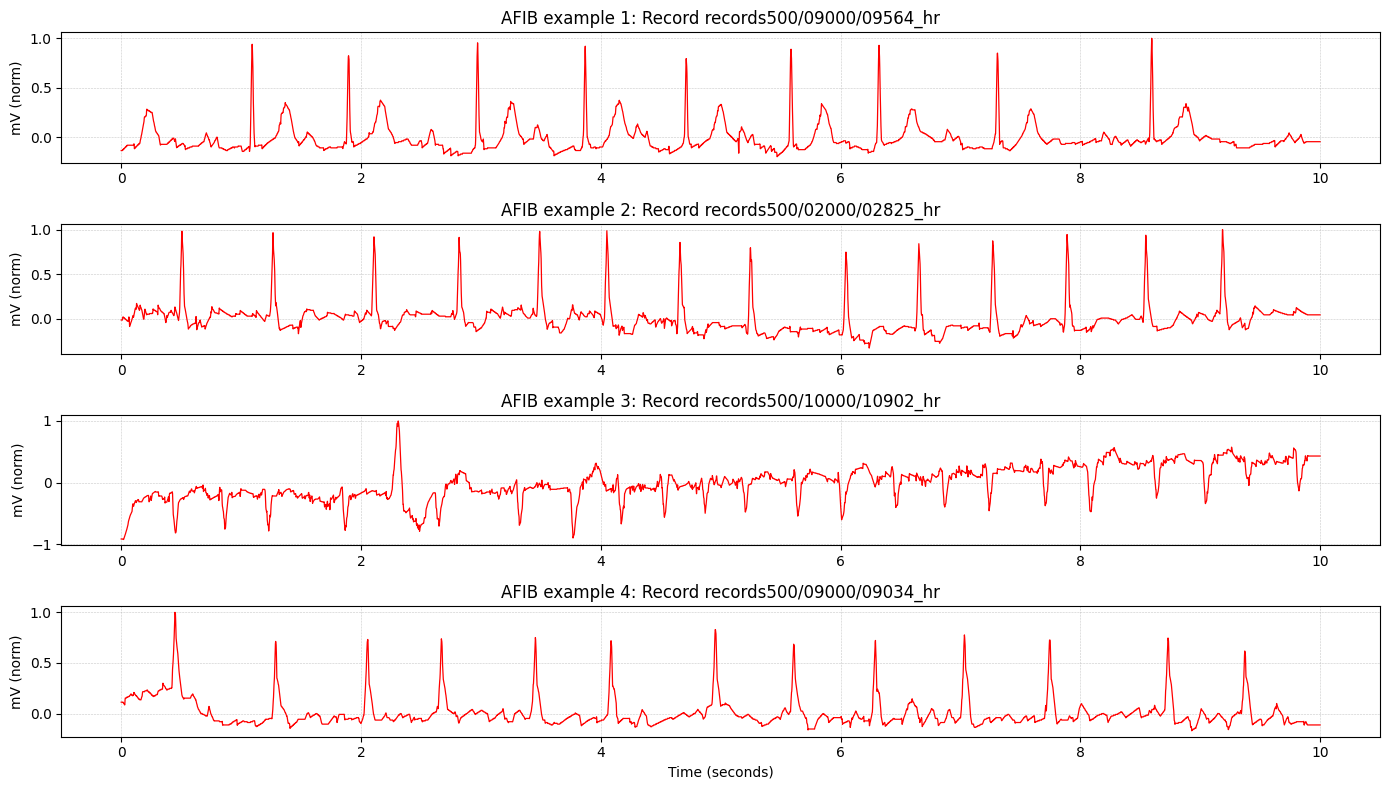

In [ ]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# --- Load metadata ---
path = "./"
df = pd.read_csv(path + "ptbxl_database.csv", index_col="ecg_id")
df["scp_codes"] = df["scp_codes"].apply(ast.literal_eval)

# --- Filter only AFIB records ---
df_afib = df[df["scp_codes"].apply(lambda d: "AFIB" in d.keys())]

print(f"Found {len(df_afib)} AFIB records in dataset.")

# --- Pick random samples (e.g. 4) ---
samples_to_show = 4
chosen_afibs = df_afib.sample(samples_to_show, random_state=None)

# --- Plot setup ---
plt.figure(figsize=(14, 2 * samples_to_show))

lead_name = "II"
duration = 10  # seconds

for i, (_, row) in enumerate(chosen_afibs.iterrows(), start=1):
    rec = wfdb.rdrecord(path + row.filename_hr)  # 500 Hz version
    fs = rec.fs
    idx = rec.sig_name.index(lead_name)
    t = np.arange(int(duration * fs)) / fs
    sig = rec.p_signal[:int(duration * fs), idx]
    sig = sig / np.max(np.abs(sig))  # normalize amplitude

    plt.subplot(samples_to_show, 1, i)
    plt.plot(t, sig, color="red", lw=0.9)
    plt.title(f"AFIB example {i}: Record {row.filename_hr}")
    plt.ylabel("mV (norm)")
    plt.grid(True, linestyle="--", linewidth=0.4, alpha=0.7)

plt.xlabel("Time (seconds)")
plt.tight_layout()
plt.show()


Data loaded successfully
ptbxl_database shape: (21799, 28)

=== Overall AFIB Statistics ===
Total records: 21799
AFIB count:    1477
AFIB percent:  6.78%

=== AFIB per Fold ===
Fold  1 → AFIB:  146 / 2175 (  6.71%)
Fold  2 → AFIB:  149 / 2181 (  6.83%)
Fold  3 → AFIB:  145 / 2192 (  6.61%)
Fold  4 → AFIB:  149 / 2174 (  6.85%)
Fold  5 → AFIB:  148 / 2174 (  6.81%)
Fold  6 → AFIB:  150 / 2173 (  6.90%)
Fold  7 → AFIB:  147 / 2176 (  6.76%)
Fold  8 → AFIB:  147 / 2173 (  6.76%)
Fold  9 → AFIB:  147 / 2183 (  6.73%)
Fold 10 → AFIB:  149 / 2198 (  6.78%)

=== Found 71 unique SCP labels ===
['1AVB', '2AVB', '3AVB', 'ABQRS', 'AFIB', 'AFLT', 'ALMI', 'AMI', 'ANEUR', 'ASMI']
['BIGU', 'CLBBB', 'CRBBB', 'DIG', 'EL', 'HVOLT', 'ILBBB', 'ILMI', 'IMI', 'INJAL']
['INJAS', 'INJIL', 'INJIN', 'INJLA', 'INVT', 'IPLMI', 'IPMI', 'IRBBB', 'ISCAL', 'ISCAN']
['ISCAS', 'ISCIL', 'ISCIN', 'ISCLA', 'ISC_', 'IVCD', 'LAFB', 'LAO/LAE', 'LMI', 'LNGQT']
['LOWT', 'LPFB', 'LPR', 'LVH', 'LVOLT', 'NDT', 'NORM', 'NST_', 'NT

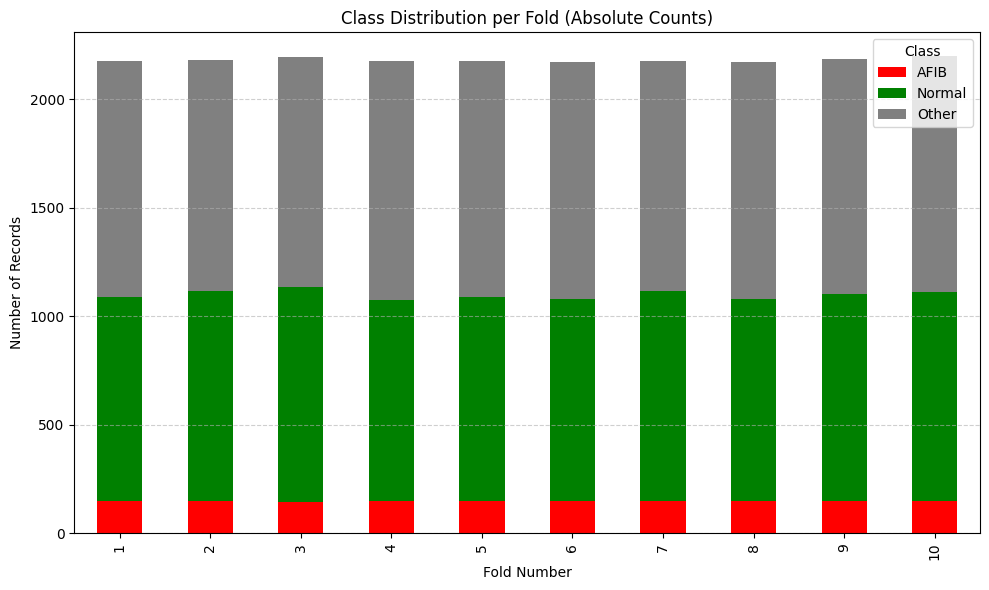

In [ ]:
df = pd.read_csv("ptbxl_database.csv")
scp_df = pd.read_csv("scp_statements.csv")

# Convert string dicts to Python dicts
df["scp_codes"] = df["scp_codes"].apply(ast.literal_eval)

print("Data loaded successfully")
print(f"ptbxl_database shape: {df.shape}")
print()


def classify_diagnosis(scp_codes):
    codes = scp_codes.keys()
    if "NORM" in codes:
        return "Normal"
    elif "AFIB" in codes:
        return "AFIB"
    else:
        return "Other"

df["Class"] = df["scp_codes"].apply(classify_diagnosis)


total_records = len(df)
afib_total = (df["Class"] == "AFIB").sum()
normal_total = (df["Class"] == "Normal").sum()
other_total = (df["Class"] == "Other").sum()

afib_percent_total = (afib_total / total_records) * 100
normal_percent_total = (normal_total / total_records) * 100
other_percent_total = (other_total / total_records) * 100

print("=== Overall AFIB Statistics ===")
print(f"Total records: {total_records}")
print(f"AFIB count:    {afib_total}")
print(f"AFIB percent:  {afib_percent_total:.2f}%")
print()

# --- Per-fold stats ---
fold_stats = (
    df.groupby("strat_fold")["Class"]
      .value_counts()
      .unstack(fill_value=0)
      .rename_axis(index="Fold")
)

print("=== AFIB per Fold ===")
for fold, row in fold_stats.iterrows():
    total_in_fold = row.sum()
    afib_in_fold = row.get("AFIB", 0)
    percent = (afib_in_fold / total_in_fold) * 100 if total_in_fold > 0 else 0
    print(f"Fold {fold:2d} → AFIB: {afib_in_fold:4d} / {total_in_fold:4d} ({percent:6.2f}%)")
print()

# --- Unique SCP labels ---
labels = sorted({k for d in df["scp_codes"].apply(lambda x: x if isinstance(x, dict) else ast.literal_eval(x)) for k in d})
print(f"=== Found {len(labels)} unique SCP labels ===")
for i in range(0, len(labels), 10):
    print(labels[i:i+10])
print()

# --- Summary ---
print("=== Summary ===")
print(f"AFIB total:  {afib_total:5d} / {total_records} ({afib_percent_total:6.2f}%)")
print(f"Normal total:{normal_total:5d} / {total_records} ({normal_percent_total:6.2f}%)")
print(f"Other total: {other_total:5d} / {total_records} ({other_percent_total:6.2f}%)")










fold_stats.plot(kind="bar", stacked=True, figsize=(10, 6), color={
        "AFIB": "red",
        "Normal": "green",
        "Other": "gray"
    })
plt.title("Class Distribution per Fold (Absolute Counts)")
plt.xlabel("Fold Number")
plt.ylabel("Number of Records")
plt.legend(title="Class", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

